# Time Series Anaylsis

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import glob

%matplotlib inline
import matplotlib.pyplot as plt

## Correlation and Autocorrelation

[Datasets](https://fred.stlouisfed.org)

In [142]:
# Read data
stocks = pd.read_csv('data/time/SP500.csv', index_col='DATE', parse_dates=True)
bonds = pd.read_csv('data/time/DGS10.csv', index_col='DATE', names=['DATE', 'US10Y'], header=0, parse_dates=True)

In [111]:
# # Convert the date index to datetime
# stocks.index = pd.to_datetime(stocks.index, format="%Y/%m/%d")
# bonds.index = pd.to_datetime(bonds.index, format="%Y/%m/%d")

In [112]:
stocks.head()

,SP500
DATE,
2009-10-05,1040.46
2009-10-06,1054.72
2009-10-07,1057.58
2009-10-08,1065.48
2009-10-09,1071.49


In [113]:
bonds.head()

,US10Y
DATE,
2009-10-05,3.24
2009-10-06,3.27
2009-10-07,3.21
2009-10-08,3.27
2009-10-09,3.40


In [134]:
stocks.dtypes, bonds.dtypes

(SP500    object
 dtype: object, US10Y    object
 dtype: object)

In [143]:
# Convert columns to numeric
stocks.SP500 = pd.to_numeric(stocks.SP500.str.replace(".", ""))/100
bonds.US10Y = pd.to_numeric(bonds.US10Y.str.replace(".", ""))/100

### Merging Time Series with Different Dates

In [144]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index.date)
set_bond_dates = set(bonds.index.date)

# Take the difference between the sets and print
print(str(set_stock_dates - set_bond_dates)[:500])

{datetime.date(2019, 4, 12), datetime.date(2019, 1, 15), datetime.date(2019, 7, 16), datetime.date(2019, 6, 26), datetime.date(2019, 3, 5), datetime.date(2019, 1, 24), datetime.date(2019, 6, 28), datetime.date(2019, 9, 4), datetime.date(2019, 3, 26), datetime.date(2019, 1, 31), datetime.date(2019, 1, 28), datetime.date(2019, 10, 3), datetime.date(2019, 2, 14), datetime.date(2019, 2, 19), datetime.date(2019, 2, 28), datetime.date(2019, 2, 22), datetime.date(2019, 9, 6), datetime.date(2019, 4, 4),


In [150]:
# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how='inner') # get the intersection of dates using the argument how='inner'

In [151]:
stocks_and_bonds.head()

,SP500,US10Y
DATE,,
2009-10-05,1040.46,3.24
2009-10-06,1054.72,3.27
2009-10-07,1057.58,3.21
2009-10-08,1065.48,3.27
2009-10-09,1071.49,3.40


### Correlation

I'll compute the correlations on the **percentage changes** rather than the levels.

In [155]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()
returns.head()

,SP500,US10Y
DATE,,
2009-10-05,NaN,NaN
2009-10-06,0.013705,0.009259
2009-10-07,0.002712,-0.018349
2009-10-08,0.007470,0.018692
2009-10-09,0.005641,0.039755


In [163]:
returns.shape

(2412, 2)

In [158]:
returns.describe()

,SP500,US10Y
count,2411.000000,2411.000000
mean,0.189145,0.000141
std,1.369988,0.020923
min,-0.903754,-0.097701
25%,-0.003652,-0.012220
50%,0.000269,0.000000
75%,0.005163,0.012024
max,9.186251,0.101064


In [188]:
returns[(returns>1).any(axis=1)].head()

,SP500,US10Y
DATE,,
2016-04-21,8.948059,0.016216
2016-04-27,9.016494,-0.036082
2016-05-02,9.078100,0.027322
2016-05-27,9.042869,0.010929
2016-06-22,8.983484,-0.011696


In [156]:
returns.corr()

,SP500,US10Y
SP500,1.000000,0.027986
US10Y,0.027986,1.000000


Correlation of stocks and interest rates:  0.027986181197028556


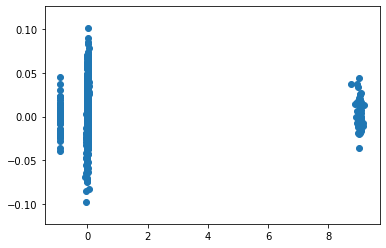

In [157]:
# Compute correlation using corr()
correlation = returns.SP500.corr(returns.US10Y)
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns.SP500, returns.US10Y)
plt.show()

The graph looks wierd. The reason is that we only chose the intersection of stocks and bonds. Therefore in some cased the stock change is huge. 

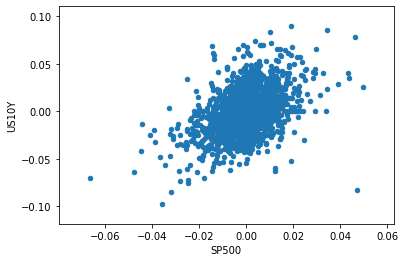

In [187]:
returns[(returns.abs()<.1).all(axis=1)].plot.scatter('SP500', 'US10Y')

The positive correlation means that when interest rates go down, stock prices go down.

### Spurious Correlation

Two trending series may show a strong correlation even if they are completely unrelated.

Let's calculate the correlation between the levels of the stock market and the annual sightings of UFOs. [datasets](http://www.nuforc.org/) 

In [199]:
dji = pd.read_csv('data/time/DJI.csv', index_col='Date',names=['Date', 'DJI'], header=0, parse_dates=True)
ufo = pd.read_csv('data/time/UFO.csv', index_col='Date',names=['Date', 'UFO'], header=0, parse_dates=True)
levels = dji.join(ufo, lsuffix='_stocks', rsuffix='_ufo')

In [200]:
levels.head()

,DJI,UFO
Date,,
1941-01-01,110.96,1
1942-01-01,119.40,2
1943-01-01,135.89,9
1944-01-01,152.32,9
1945-01-01,192.91,9


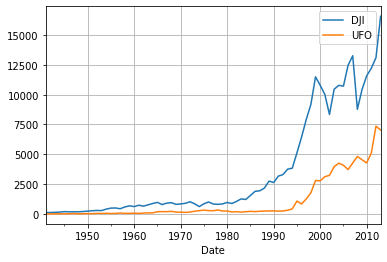

In [205]:
levels.plot(grid=True)

We should look at the correlation of their **returns** instead of **levels** to get a better sense of it. We can calculate the _returns (instead of prices)_ of the series with `.pct_change()` method.

In [201]:
# Compute correlation of levels
correlation1 = levels.DJI.corr(levels.UFO)
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes.DJI.corr(changes.UFO)
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9399762210726432
Correlation of changes:  0.06026935462405376


Notice that the correlation on levels is high but the correlation on changes is close to zero!!!

### Simple Linear Regression and R-squared

>R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In [ ]:
.
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y, dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

### Autocorrelation

Autocorrelation is the correlation of a single time series with a lagged copy of itself. It is also called 'serial correlation' or 'lag-one correlation'. With financial data (time series data), positive autocorralation is called _trend following (momentum)_ while negative correlation is called _mean reverting_. Note that `.autocorr()` method only works on Series, not DataFrames.

In [215]:
MSFT = pd.read_csv('data/time/MSFT.csv', index_col='Date')

# Convert the date index to datetime
MSFT.index = pd.to_datetime(MSFT.index, format="%m/%d/%Y")

In [216]:
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


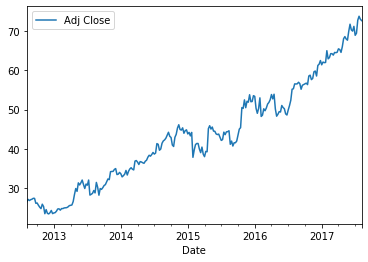

In [219]:
MSFT.plot()

[Autocorrelation Plots](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#autocorrelation-plot) are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations.

Autocorrelation plots can very quickly give an idea of which lag variables may be good candidates for use in a predictive model, and how the relationship between the observation and its historic values changes over time.

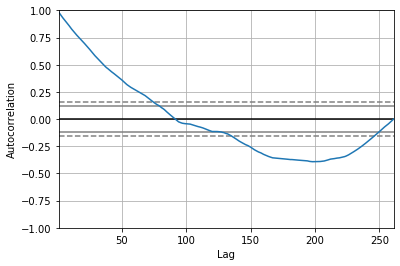

In [220]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(MSFT)

[Lag Plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#lag-plot) is used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random.

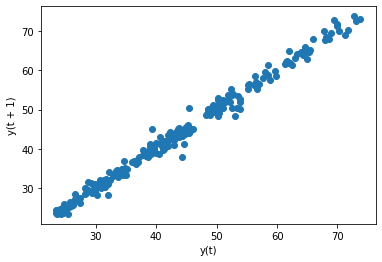

In [345]:
from pandas.plotting import lag_plot

lag_plot(MSFT, lag=1)

The graph clearly shows a relationship or some correlation.

In [289]:
# Convert the daily data to weekly data
MSFT = MSFT.resample(rule='W').last()
#MSFT = MSFT.resample(rule='W', how='last') # deprecated

# Compute the percentage change of prices
returns = MSFT.pct_change()

In [231]:
returns.head()

,Adj Close
Date,
2012-08-12,NaN
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508
2012-09-09,0.004218


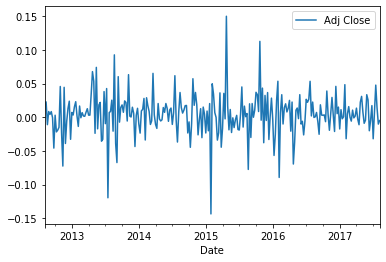

In [232]:
returns.plot()

In [290]:
# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


The autocorrelation of returns for MSFT is negative, so the stock is _mean reverting_. 

> Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. **A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.**

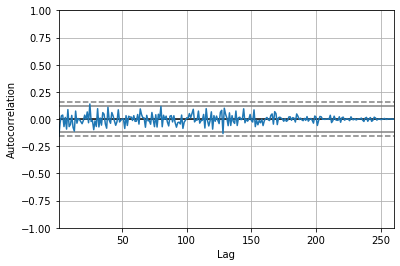

In [294]:
# Plot autocorrelation of 'returns'
autocorrelation_plot(returns.dropna()) # Drop the first row

In [239]:
returns.join(returns.shift(1), rsuffix='_lag').head()

,Adj Close,Adj Close_lag
Date,,
2012-08-12,NaN,NaN
2012-08-19,0.022508,NaN
2012-08-26,-0.011003,0.022508
2012-09-02,0.008508,-0.011003
2012-09-09,0.004218,0.008508


In [240]:
# Autocorrelation - another way to compute
returns.join(returns.shift(1), rsuffix='_lag').corr()

,Adj Close,Adj Close_lag
Adj Close,1.000000,-0.156813
Adj Close_lag,-0.156813,1.000000


In [259]:
daily_rates = pd.read_csv('data/time/US10Y.csv', index_col='DATE', names=['DATE', 'US10Y'], header=0, 
                          parse_dates=True)
daily_rates.US10Y = pd.to_numeric(daily_rates.US10Y.str.replace(".", ""))/100

In [253]:
daily_rates.head()

,US10Y
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [255]:
# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule='A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily interest rate changes is 0.07
The autocorrelation of annual interest rate changes is -0.22


The daily autocorrelation is small but the annual autocorrelation is large and negative.
> This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated.

#### Autocorrelation Function - Autocorrelation over many lags

Any significant non-zero autocorrelation implies the the series can be forecasted from the past.

In [265]:
HRB = pd.read_csv('data/time/HRB.csv', index_col='Quarter', names=['Quarter', 'Earnings'], header=0, 
                          parse_dates=True)

In [266]:
HRB.head()

,Earnings
Quarter,
2007-01-01,-0.36
2007-04-01,-0.38
2007-07-01,0.07
2007-10-01,1.85
2008-01-01,-0.34


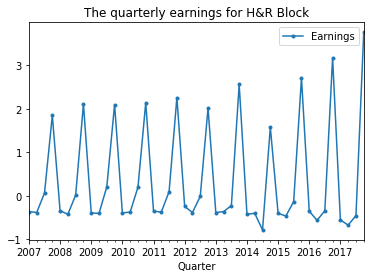

In [270]:
HRB.plot(marker='.', title='The quarterly earnings for H&R Block')

In the graph we can see a seasonal pattern in the quarterly data, and an extreme cyclicality of earnings. 

I'll now compute the _array of autocorrelations (ACF)_ for the H&R Block quarterly earnings. Next, I'll plot the **autocorrelation function** using the `plot_acf` module.

Note that the ACF at `lag=0` is always one. `alpha` is the confidence interval.

(0, 1.0)
(1, -0.22122696185495896)
(2, -0.39856503706915863)
(3, -0.26615092984230937)
(4, 0.8347980432644097)
(5, -0.19010380127190252)
(6, -0.347563395157874)
(7, -0.2314036804737642)
(8, 0.7199599324810255)
(9, -0.15661007441991506)
(10, -0.29766783304350225)
(11, -0.2209718903204633)
(12, 0.6165693325563671)
(13, -0.15022868761047536)
(14, -0.27922021550394927)
(15, -0.2246594612570115)
(16, 0.5725258972196683)
(17, -0.08758287537438475)
(18, -0.2407558393682488)
(19, -0.20363054123206115)
(20, 0.4797057954767399)
(21, -0.06091139198771554)
(22, -0.20935484454477332)
(23, -0.18303201698549693)
(24, 0.42481274801331137)
(25, -0.033525591338831096)
(26, -0.174710870794539)
(27, -0.16384327756075784)
(28, 0.34341079309697675)
(29, -0.01734363887921487)
(30, -0.13820810884776022)
(31, -0.12232172176874935)
(32, 0.2840716368814168)
(33, -0.019276561902786517)
(34, -0.11757973635652001)
(35, -0.103869331276977)
(36, 0.20156484728613944)
(37, -0.01206340170260387)
(38, -0.0750953930940091

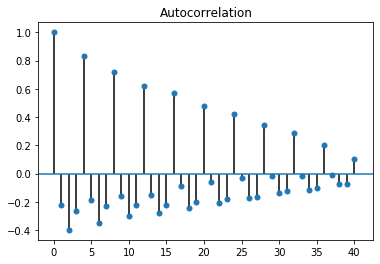

In [279]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(*list(enumerate(acf_array)), sep = "\n")

# Plot the acf function
plot_acf(HRB, alpha=1, lags=40)
plt.show()

There appears to be a strong positive autocorrelation at lags 4, 8, 12, and so on.

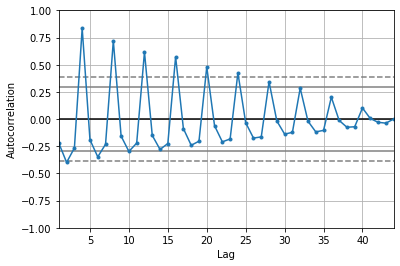

In [281]:
## Autocorrelation Plot with pandas

# from pandas.plotting import autocorrelation_plot

autocorrelation_plot(HRB, marker='.')

#### Confidence Interval for the ACF

The weekly returns of Microsoft -> `returns`.

In [297]:
returns.dropna(inplace=True)
returns.head()

,Adj Close
Date,
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508
2012-09-09,0.004218
2012-09-16,0.008400


The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


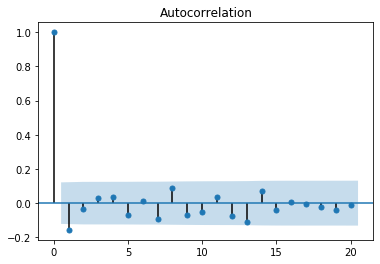

In [298]:
# Import the plot_acf module from statsmodels and sqrt from math
# from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
num_obs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(num_obs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

The autocorrelation with `lag 1` is **significantly negative**, but other lags are not significantly different from zero. Therefore, the returns on the stock market are pretty close to a [white noise](https://en.wikipedia.org/wiki/White_noise#White_random_process_.28white_noise.29) process. 

#### White Noise and Random Walk

In the case of a _white noise_ Time Series, future observations cannot be forecasted based on the past since the autocorrelations at all lags are close to zero.

The mean is 0.019 and the standard deviation is 0.049


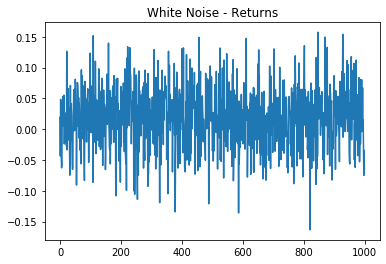

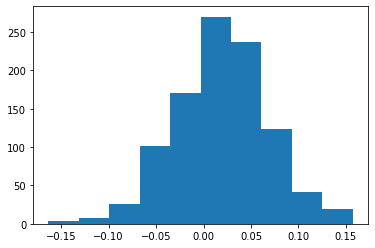

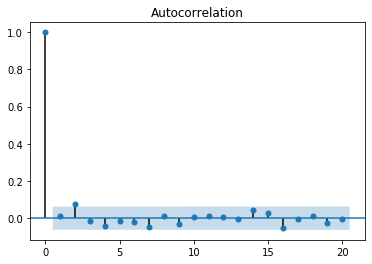

In [322]:
# Simulate white noise returns
white_noise_returns = np.random.normal(loc=.02, scale=.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(white_noise_returns)
std = np.std(white_noise_returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(white_noise_returns)
plt.title("White Noise - Returns")
plt.show()

# Plot histogram of returns series
plt.hist(white_noise_returns)
plt.show()

# Plot autocorrelation function of white noise returns
plot_acf(white_noise_returns, lags=20)
plt.show()

Whereas **stock returns** are often modeled as _white noise_, **stock prices** closely follow a _random walk_. In such a case, today's price is yesterday's price plus some random noise. 

I'll now simulate the price of a stock over time that has a starting price of 100 and every day goes up or down by a random amount.

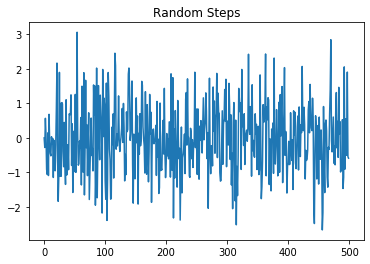

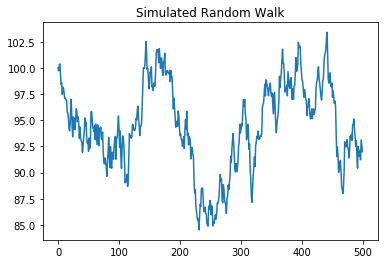

In [326]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Plot steps
plt.plot(steps)
plt.title("Random Steps")
plt.show()


# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

**Random Walk with a Drift**

Many time series, like stock prices, are random walks but tend to drift up over time. The noise in the random walk (w/o drift) was additive: random, normal changes in price were added to the last price. However, when adding noise, we could theoretically get negative prices. Now I'll make the noise multiplicative:
- add one to the random steps, 
- normal changes to get a total return,
- multiply that by the last price.

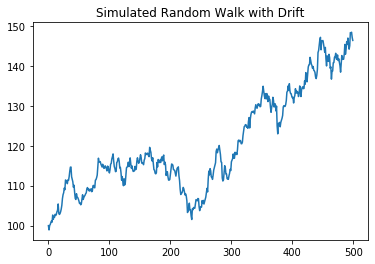

In [328]:
# Generate 500 random steps
steps = np.random.normal(loc=.001, scale=.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

Different Method Curves illustrates the different [non-seasonal and seasonal curves](https://docs.oracle.com/cd/E57185_01/CBPUG/ch03s04s01.html#forecast_42)
![](https://docs.oracle.com/cd/E57185_01/CBPUG/images/graphics/method_curves.gif)

Most stock prices follow a random walk (perhaps with a drift). I'll now investigate the stock prices of Amazon and run the **Augmented Dickey-Fuller (ADF)** test to understand whether it follows a random walk. With the ADF test, the "null hypothesis" is that the series follows a random walk.

In [331]:
AMZN = pd.read_csv('data/time/AMZN.csv', index_col='Date', names=['Date', 'Adj Close'], header=0, 
                          parse_dates=True)

In [332]:
AMZN.head()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


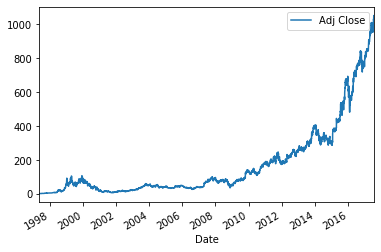

In [334]:
AMZN.plot()

In [333]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.025168525770742, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


According to this test, we cannot reject the hypothesis that Amazon prices follow a random walk. 

I'll now look further into the Amazon returns (percentage changes in prices).

The p-value of the test on returns is: 2.565589808344604e-22


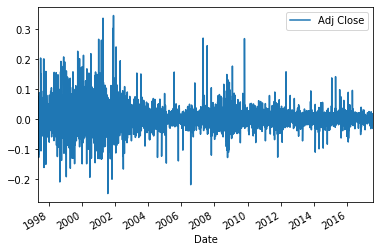

In [337]:
# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Plot AMZN_ret
AMZN_ret.plot()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

Since the p-value is extremely small, we can now reject the hypothesis that returns are a random walk at all levels of significance.

### Stationarity

**Strong stationarity:** the entire (or joint) distribution of data is time-invariant(not depend on time

**Weak stationarity:** mean, variance and autocorrelation are time-invariant.

If a process is not stationary, then it becomes difficult to model. When the parameters do not vary with time it is easier to model. A random walk is a non-stationary series, since the _variance_ grows with time. Seasonal series are also non-stationary since the mean varies with time of the year.

The good thing is, we can **transform** non-stationary series into stationary series. For example, we can make a _seasonal adjustment_ to series which exhibit seasonal behavior. Let's look at the HRB data. There is a clear seasonal component. The autocorrelation is high for lags 4, 8, 12 and so on.

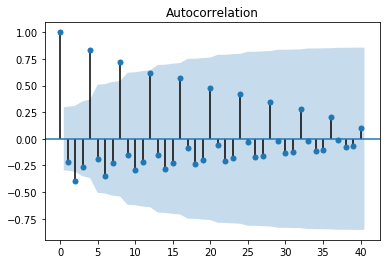

In [340]:
# Plot the acf function of HRB data
plot_acf(HRB, lags=40)
plt.show()

By seasonally adjusting the series, we can eliminate the seasonal pattern in the autocorrelation function.

            Earnings
Quarter             
2007-01-01       NaN
2007-04-01       NaN
2007-07-01       NaN
2007-10-01       NaN
2008-01-01      0.02
2008-04-01     -0.04
2008-07-01     -0.05
2008-10-01      0.26
2009-01-01     -0.05
2009-04-01      0.02


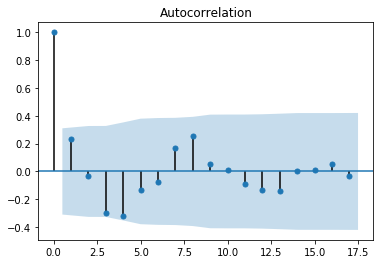

In [341]:
# Seasonally adjust quarterly earnings by taking the lag-4 difference
HRBsa = HRB.diff(periods=4)
## I apply a seasonal adjustment by taking the fourth difference since four represents the periodicity of the series

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

## Autoregressive (AR) Models

An autoregressive (AR) model is a representation of a type of random process. AR specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term). Together with the moving-average (MA) model, it is a special case and key component of the more general ARMA and ARIMA models of time series, which have a more complicated stochastic structure. Contrary to the moving-average model, the autoregressive model is not always stationary. [wikipedia](https://en.wikipedia.org/wiki/Autoregressive_model)

Autoregression is a time series model that uses observations from previous time steps (or lagged variables) as input to a regression equation to predict the value at the next time step. 

We could calculate the linear regression model manually using the `LinearRegession` class in scikit-learn and manually specify the lag input variables to use. Alternately, the `statsmodels` library provides an autoregression model that automatically selects an appropriate lag value using statistical tests and trains a linear regression model. It is provided in the [AR class](http://www.statsmodels.org/devel/generated/statsmodels.tsa.ar_model.AR.html). The AR in statsmodels does assume that the data is stationary. If it is not stationary, we must make it stationary (e.g. differencing and other transforms). [source](https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/)

**AR(p) processes** (p -> model order)

The simplest AR process is AR(0), which has no dependence between the terms. Only the error/innovation/noise term contributes to the output of the process, so in the figure, AR(0) corresponds to white noise.

For an AR(1) process with a positive φ, only the previous term in the process and the noise term contribute to the output.  If φ is close to 0, then the process still looks like white noise, but as φ approaches 1, the output gets a larger contribution from the previous term relative to the noise. For an AR(2) process, the previous two terms and the noise term contribute to the output. 

AR(1) process is given by:
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d5f44a8ddc9b27d332341c319ee16e6c498834e6)

- Negative $ϕ$: Mean Reversion 
- Positive $ϕ$: Momentum
- For stationarity, −1 < φ < 1

Example:
When inputting the coefficients, the zero-lag coefficient of 1 must be included. Moreover, the sign of the other coefficients is opposite of what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with `ϕ=0.9`, the array representing the AR parameters would be `ar = np.array([1, -0.9])`.

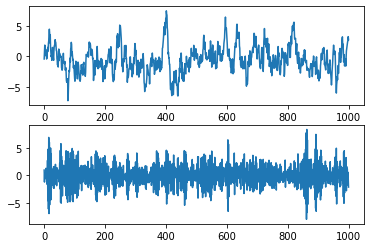

In [342]:
# import the module for simulating data 
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter ϕ = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter ϕ = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

The two AR parameters produce very different looking time series plots.

In [343]:
# AR parameter ϕ = +0.3
ar3 = np.array([1, -0.3])
ma3 = np.array([1])
AR_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = AR_object3.generate_sample(nsample=1000)

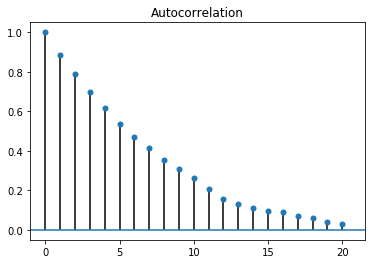

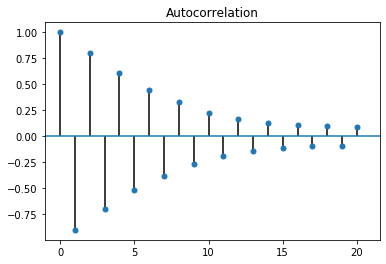

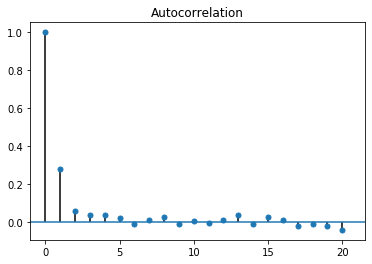

In [344]:
# Compute and plot the autocorrelation function 

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

### Estimating the Parameters of the AR Model

Now, I'll estimate the AR(1) parameter of the `simulated_data_1`.

In [347]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
model = ARMA(simulated_data_1, order=(1,0))
result = model.fit()

# Print out summary information on the fit
print(result.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(result.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1442.732
Method:                       css-mle   S.D. of innovations              1.023
Date:                Mon, 07 Oct 2019   AIC                           2891.464
Time:                        01:15:53   BIC                           2906.187
Sample:                             0   HQIC                          2897.060
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4893      0.279     -1.754      0.080      -1.036       0.058
ar.L1.y        0.8849      0.015     60.228      0.000       0.856       0.914
                                    Roots           

### Forecasting with AR Model

We can do both in-sample and out-of-sample forecasting using `statsmodels`. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. 

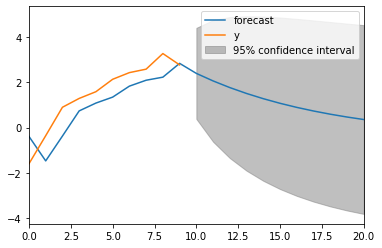

In [349]:
# # Import the ARMA module from statsmodels
# from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
model = ARMA(simulated_data_1, order=(1,0))
result = model.fit()
result.plot_predict(start=990, end=1010)
plt.show()

When phi is high like here, the forecast gradually moves to the long term mean of zero, but if phi were low, it would move much quicker to the long term mean.

Example with real world data:

In [350]:
daily_rates.head()

,US10Y
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03


In [365]:
# Resample the data
interest_rate_data = daily_rates.resample(rule='Y').last()

In [370]:
interest_rate_data.tail()

,US10Y
DATE,
2015-12-31,2.27
2016-12-31,2.45
2017-12-31,2.40
2018-12-31,2.69
2019-12-31,1.54


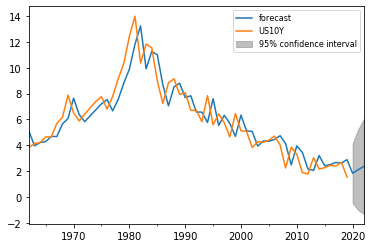

In [369]:
# Forecast interest rates using an AR(1) model
model = ARMA(interest_rate_data.dropna(), order=(1,0))
result = model.fit()

# Plot the original series and the forecasted series
result.plot_predict(start=0, end='2022') 
###!!! 2022 must be in quotes here since it represents a date and not an integer position
plt.legend(fontsize=8)
plt.show()

According to an AR(1) model, 10-year interest rates are forecasted to rise from 1.54%, towards the end of 2019 to around 3% in three years.

Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. 

In [382]:
# Generate 50 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=len(interest_rate_data))

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
simulated_data = 100 + np.cumsum(steps)

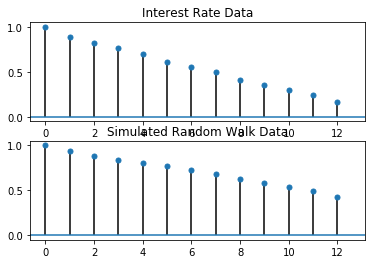

In [388]:
# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

Notice the Autocorrelation functions look very similar for the two series.

### Estimating the Order of an AR Model: Choosing the Right Model

There are two main techniques to determine the order of an AR Model:
- Partial Autocorrelation Function (PACF)
- Information criteria.

#### PACF

In the below example, for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.

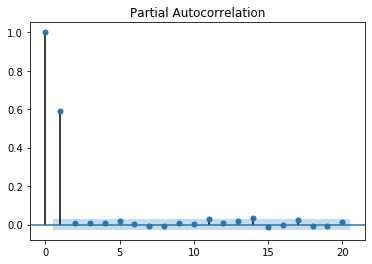

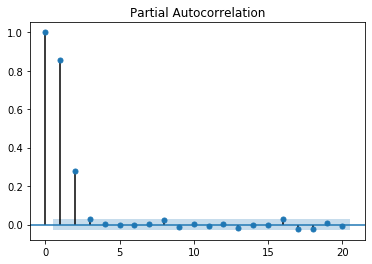

In [389]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -.6, -.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

The number of significant lags for the PACF indicate the order of the AR model

#### Information Criteria

We can look at the **Akaike Information Criterion (AIC)** and the **Bayesian Information Criterion (BIC)** to identify the order of a model. 
> These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model.

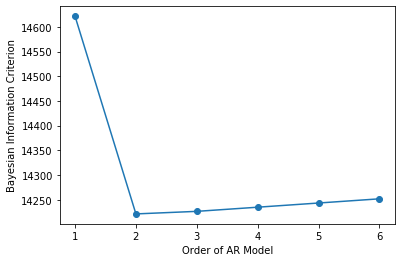

In [391]:
# Import the module for estimating an ARMA model
# from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p, 0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

As expected, for an AR(2) the BIC achieves its minimum at p=2.

## Moving Average (MA) and ARMA Models

the sign of the MA coefficients is what we would expect in MA object. For example, for an MA(1) process with `θ=−0.9`, the array representing the MA parameters would be `ma = np.array([1, -0.9])`.

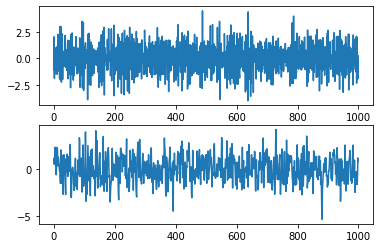

In [392]:
# # import the module for simulating data
# from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, .9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

The two MA parameters produce different time series plots.

Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc. 

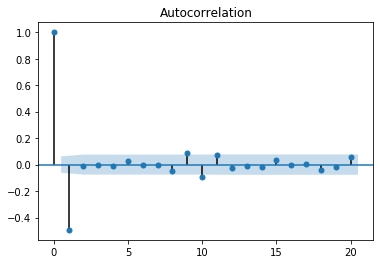

In [393]:
# # Import the plot_acf module from statsmodels
# from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()

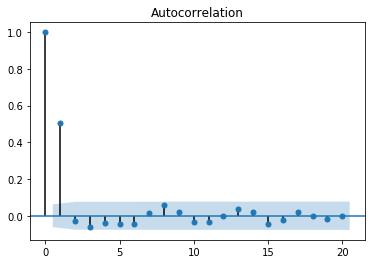

In [394]:
# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags=20)
plt.show()

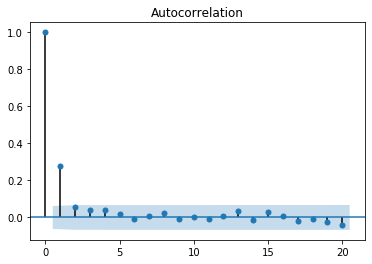

In [395]:
# Plot 3: MA parameter = -0.3
plot_acf(simulated_data_3, lags=20)
plt.show()

### Estimating an MA Model

In [396]:
# # Import the ARMA module from statsmodels
# from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1440.564
Method:                       css-mle   S.D. of innovations              1.021
Date:                Mon, 07 Oct 2019   AIC                           2887.129
Time:                        22:57:18   BIC                           2901.852
Sample:                             0   HQIC                          2892.725
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.003     -0.450      0.653      -0.007       0.005
ma.L1.y       -0.9082      0.013    -70.708      0.000      -0.933      -0.883
                                    Roots           

### Forecasting with MA Model

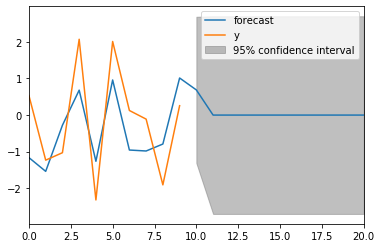

In [397]:
# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

For the MA model, the out-of-sample forecasts are flat into the future after the first data point!

Info:
- Higher frequency stock data is well modeled by an MA(1) process

### Read World Example

In [407]:
intraday = pd.read_csv('data/time/Sprint_Intraday.csv', header=None,
                      usecols=[0,1])

In [400]:
intraday.head()

,0,1
0,a1504272600,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


In [406]:
# Examine the data types for each column
print(intraday.dtypes)

CLOSE    float64
dtype: object


In [408]:
# import datetime module
# import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE', 'CLOSE']

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')

In [409]:
intraday.head(3)

,CLOSE
DATE,
0,8.29
1,8.27
2,8.28


In [411]:
intraday.shape

(389, 1)

In [410]:
# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))

If there were no missing rows, there would be 391 rows of minute data
The actual length of the DataFrame is: 389


In [412]:
# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday

# Print the difference
print("Missing rows: ", set_missing)

Missing rows:  {182, 14}


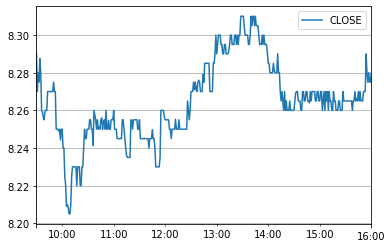

In [413]:
# From previous step
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

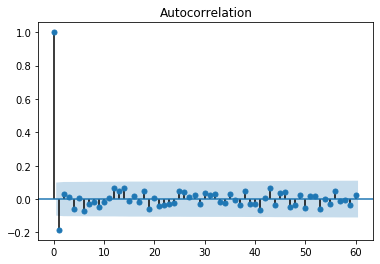

const         -0.000002
ma.L1.CLOSE   -0.179273
dtype: float64


In [414]:
# # Import plot_acf and ARMA modules from statsmodels
# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.tsa.arima_model import ARMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

Notice the significant negative lag-1 autocorrelation, just like for an MA(1) model.

AR(1) model is equivalent to an MA(∞) model with the appropriate parameters.

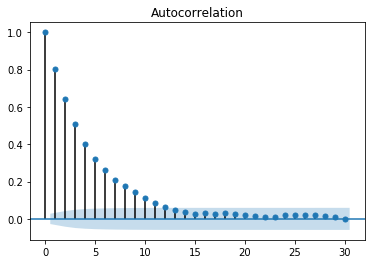

In [415]:
# # import the modules for simulating data and plotting the ACF
# from statsmodels.tsa.arima_process import ArmaProcess
# from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

ACF looks the same as an AR(1) with parameter 0.8.

## Cointegration Models